In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [178]:
df=pd.read_csv('cleaned_apartments.csv')

In [179]:
df.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,square_feet,cityname,state,latitude,longitude
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Ele...",2.0,2.0,USD,0,0,yes,1920.0,"$1,920",2,Other,GA,34.0648,-84.0849
1,"AC,Cable or Satellite,Clubhouse,Gated,Gym,Inte...",1.0,1.0,USD,0,0,yes,973.0,$973,1,Other,LA,32.4544,-93.7135
2,NaN,1.0,0.0,USD,0,0,yes,1585.0,"$1,585",1,Los Angeles,CA,34.0372,-118.2972
3,"Cable or Satellite,Clubhouse,Dishwasher,Gated,...",1.0,1.0,USD,0,0,yes,950.0,$950,1,Other,TX,27.8689,-97.2057
4,"Parking,Pool,Tennis",1.0,2.0,USD,0,0,no,1275.0,"$1,275",1,Other,Other,41.7588,-72.6148


In [180]:
df=df.drop(columns=['currency','price_display'])

In [181]:
df['bathrooms'].value_counts()

,count
bathrooms,
1.0,62877
2.0,38935
1.5,3449
2.5,2394
3.0,1063
3.5,273
4.0,166
4.5,54
5.0,28


In [182]:
def categorize_bathrooms(df, col='bathrooms'):
    df[col] = pd.to_numeric(df[col], errors='coerce')

    def convert(b):
        if b <= 1:
            return 1
        elif b <= 2:
            return 2
        elif b <= 3:
            return 3
        elif b <= 4:
            return 4
        else:
            return 5

    df['bathrooms'] = df[col].apply(convert)
    return df
df=categorize_bathrooms(df)

In [183]:
def categorize_bathrooms(df, col='bedrooms'):
    df[col] = pd.to_numeric(df[col], errors='coerce')

    def convert(b):
        if b <= 1:
            return 3
        elif b <= 4:
            return 4
        elif b <= 5:
            return 5
        elif b <= 6:
            return 6
        else:
            return 7

    df['bedrooms'] = df[col].apply(convert)
    return df
df=categorize_bathrooms(df)

In [184]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,62877
2,42384
3,3457
4,439
5,251


In [185]:
print(sum(df['amenities'].value_counts()>400))

22


In [186]:

top_amenities = df['amenities'].value_counts()[df['amenities'].value_counts() > 400].index
df['amenities'] = df['amenities'].apply(
    lambda x: x if x in top_amenities else 'Other'
)

df_formodel=df

In [187]:
df['amenities'].value_counts()

,count
amenities,
Other,85762
Parking,6404
"Parking,Storage",2181
"Gym,Pool",1925
Pool,1654
"Gym,Parking,Pool",1239
"Parking,Pool",977
Washer Dryer,861
Patio/Deck,806


In [188]:
df.to_csv('part2cleaned.csv',index=False)

In [189]:
df.shape

(109408, 12)

In [190]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109408 entries, 0 to 109407
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   amenities     109408 non-null  object 
 1   bathrooms     109408 non-null  int64  
 2   bedrooms      109408 non-null  int64  
 3   fee           109408 non-null  int64  
 4   has_photo     109408 non-null  int64  
 5   pets_allowed  109408 non-null  object 
 6   price         109408 non-null  float64
 7   square_feet   109408 non-null  int64  
 8   cityname      109408 non-null  object 
 9   state         109408 non-null  object 
 10  latitude      109327 non-null  float64
 11  longitude     109408 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.0+ MB


In [191]:

df.describe()


,bathrooms,bedrooms,fee,has_photo,price,square_feet,latitude,longitude
count,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000,109408.000000,109327.000000,109408.000000
mean,1.471803,3.591611,0.002258,0.086164,1523.036917,1.380658,37.016215,-91.845165
std,0.603331,0.522299,0.047461,0.280607,921.354804,0.653473,4.694450,15.832517
min,1.000000,3.000000,0.000000,0.000000,100.000000,0.000000,19.573800,-159.369800
25%,1.000000,3.000000,0.000000,0.000000,1001.000000,1.000000,33.746200,-104.781100
50%,1.000000,4.000000,0.000000,0.000000,1349.000000,1.000000,37.338200,-85.909900
75%,2.000000,4.000000,0.000000,0.000000,1786.000000,2.000000,40.035100,-78.463600
max,5.000000,7.000000,1.000000,1.000000,52500.000000,3.000000,64.833200,-68.778800


In [192]:

df.describe(include="object")


,amenities,pets_allowed,cityname,state
count,109408,109408,109408,109408
unique,23,4,29,21
top,Other,no,Other,Other
freq,85762,64513,78419,14862


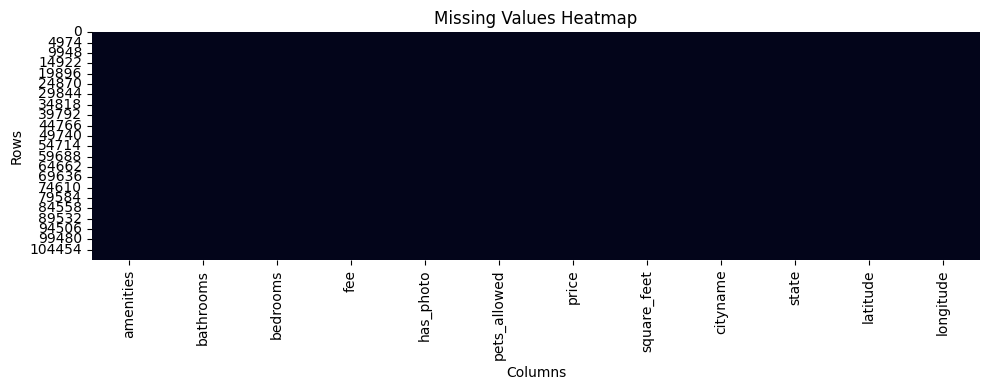

In [193]:
# Missing values heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()


with targret variable cheaking important features

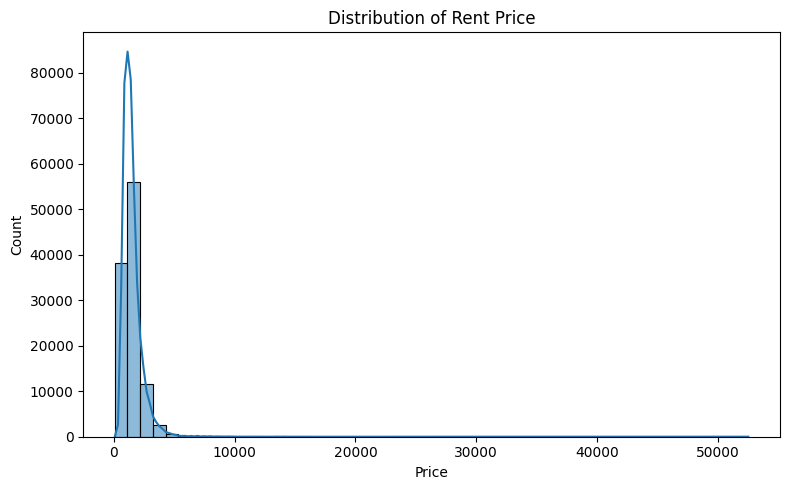

In [194]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="price", kde=True, bins=50)
plt.title("Distribution of Rent Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


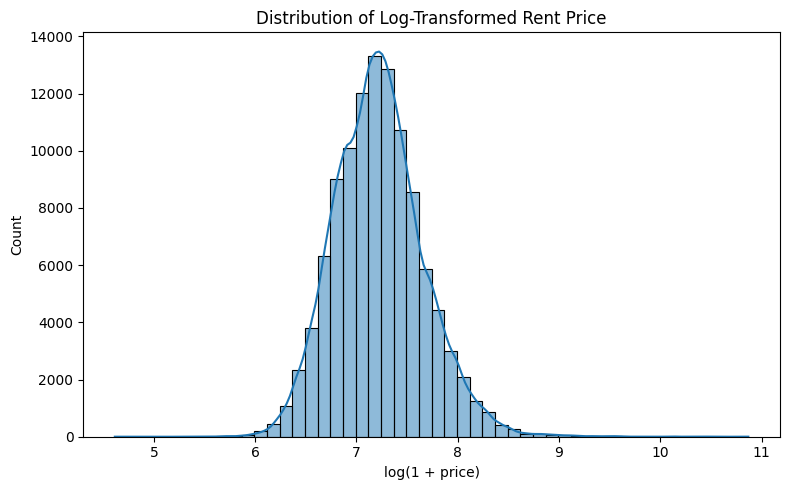

In [195]:
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="log_price", kde=True, bins=50)
plt.title("Distribution of Log-Transformed Rent Price")
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


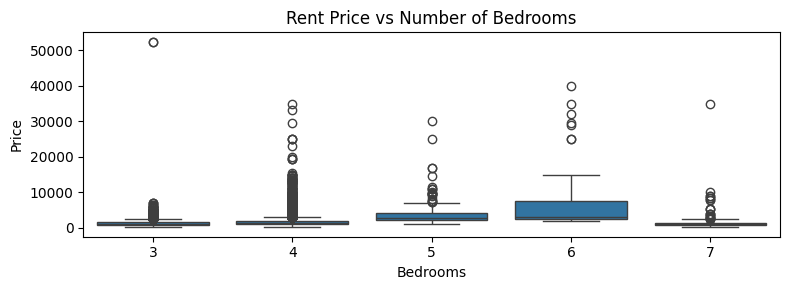

In [196]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Rent Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


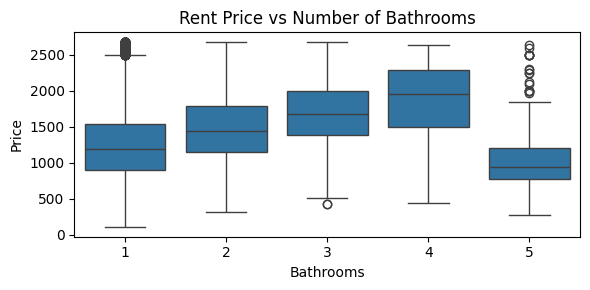

In [224]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x="bathrooms", y="price")
plt.title("Rent Price vs Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


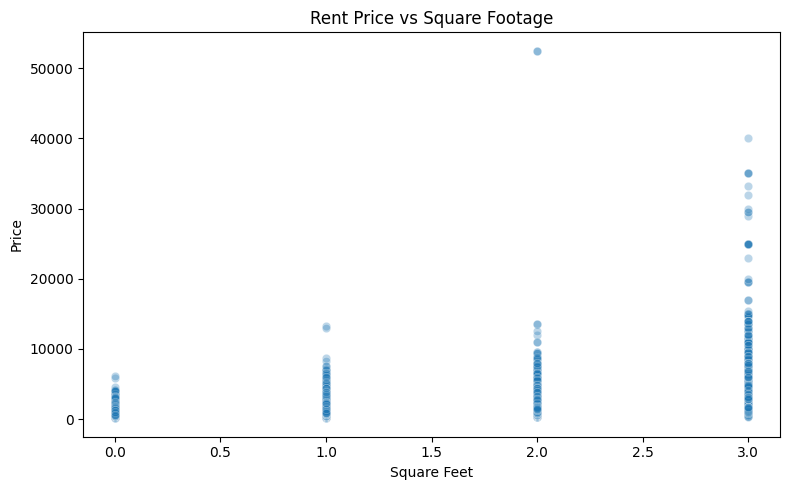

In [198]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="square_feet", y="price", alpha=0.3)
plt.title("Rent Price vs Square Footage")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


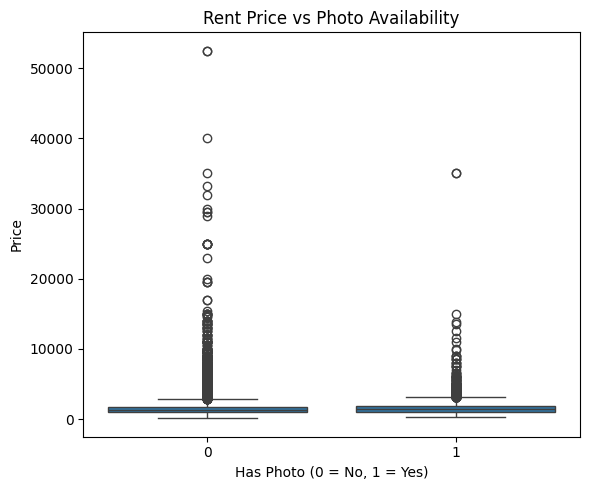

In [199]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="has_photo", y="price")
plt.title("Rent Price vs Photo Availability")
plt.xlabel("Has Photo (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


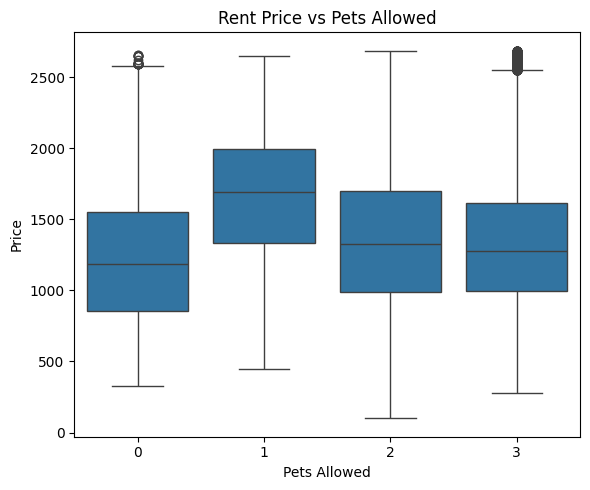

In [223]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="pets_allowed", y="price")
plt.title("Rent Price vs Pets Allowed")
plt.xlabel("Pets Allowed")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


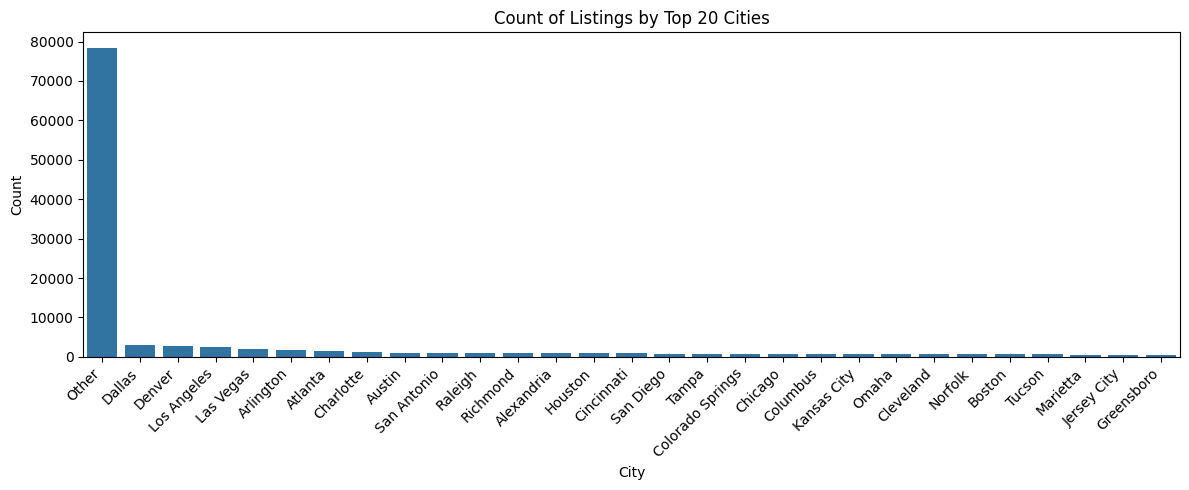

In [201]:
plt.figure(figsize=(12, 5))
city_order = df["cityname"].value_counts().index

sns.countplot(data=df, x="cityname", order=city_order)
plt.title("Count of Listings by Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


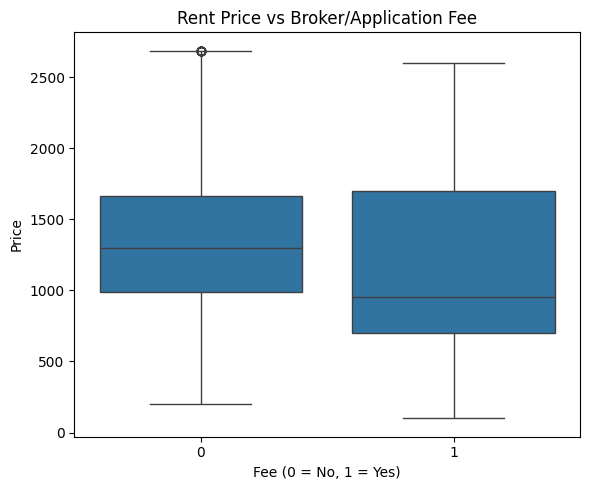

In [222]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="fee", y="price")
plt.title("Rent Price vs Broker/Application Fee")
plt.xlabel("Fee (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


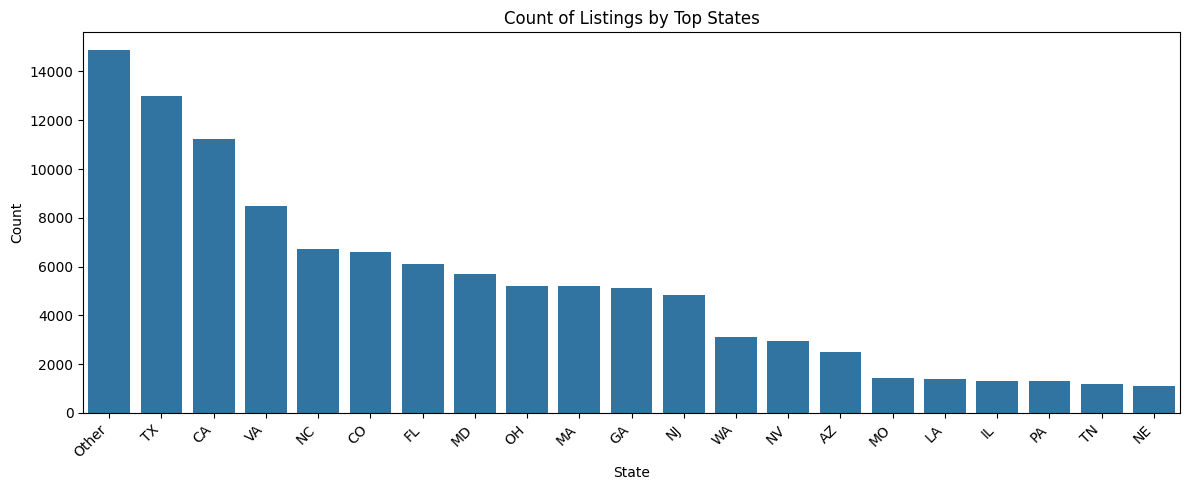

In [203]:
plt.figure(figsize=(12, 5))
state_order = df['state'].value_counts().index

sns.countplot(data=df, x="state", order=state_order)
plt.title("Count of Listings by Top States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


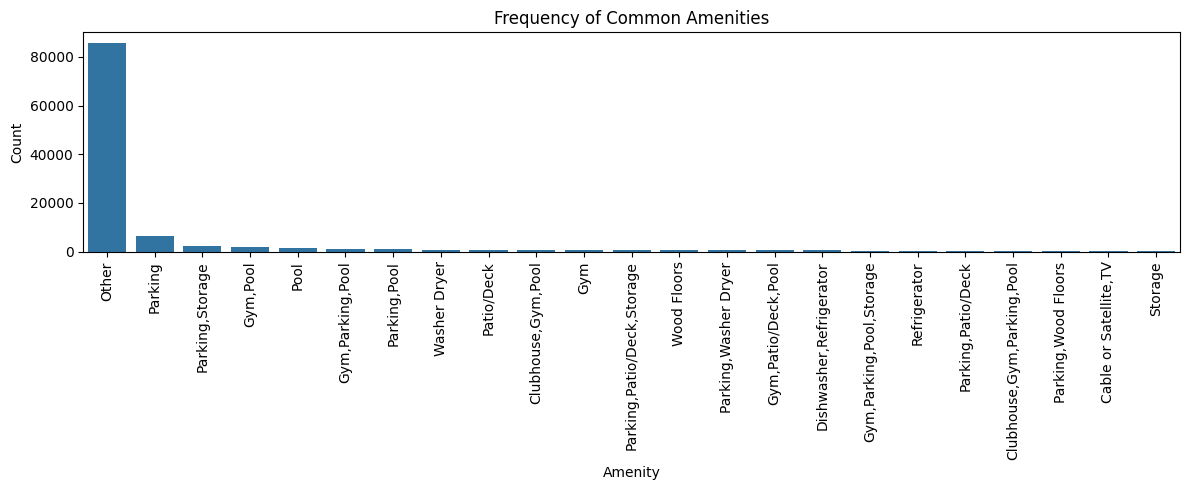

In [204]:
plt.figure(figsize=(12, 5))
amenity_order = df["amenities"].value_counts().index[:25]

sns.countplot(data=df, x="amenities", order=amenity_order)
plt.title("Frequency of Common Amenities")
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


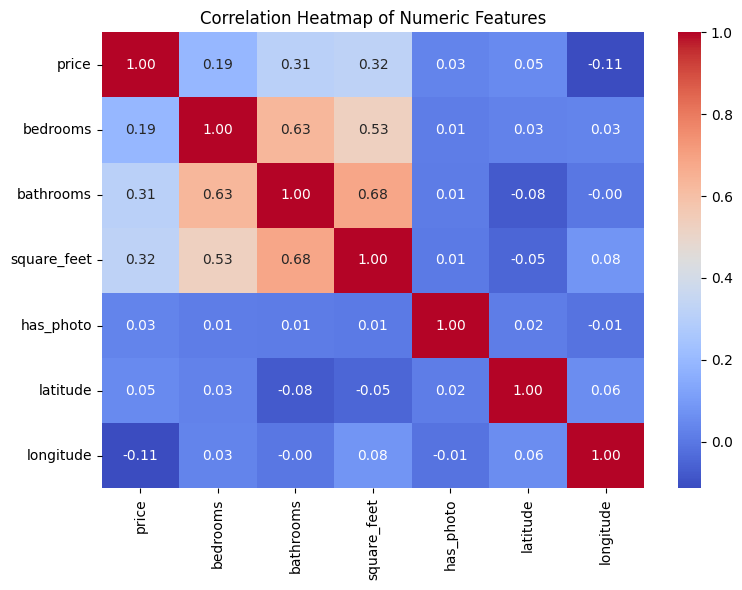

In [205]:
numeric_cols = ["price", "bedrooms", "bathrooms", "square_feet",
                "has_photo", "latitude", "longitude"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


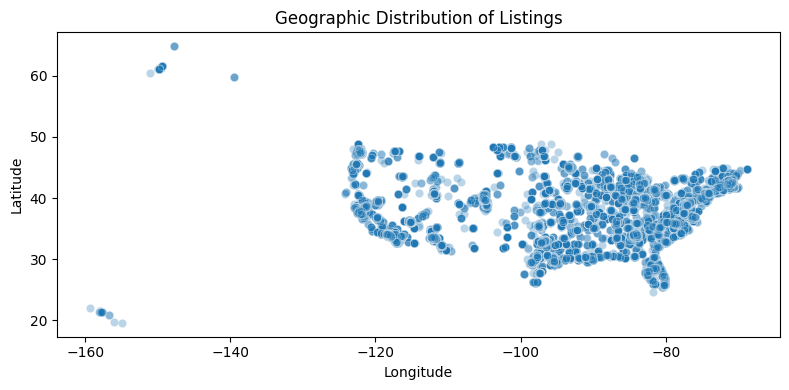

In [206]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df.sample(100000, random_state=42), x="longitude", y="latitude", alpha=0.3)
plt.title("Geographic Distribution of Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


the eda we make tell us that there is huge amount of imbalanced and outliered data set so we have to clean that to get the best result we want to to get

In [207]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} IQR bounds:")
    print(f"Lower: {lower_bound}, Upper: {upper_bound}")

    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Removed {len(df) - len(df_clean)} outliers from {column}")
    return df_clean



<Axes: xlabel='price'>

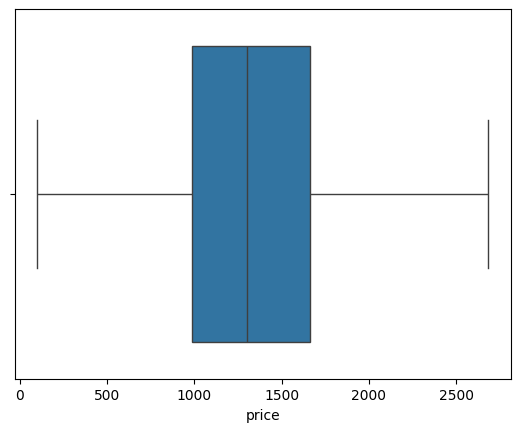

In [225]:
sns.boxplot(data=df, x="price")

In [221]:
df=remove_outliers_iqr(df,'price')
df=remove_outliers_iqr(df,'price')
df=remove_outliers_iqr(df,'price')
df=remove_outliers_iqr(df,'price')
df=remove_outliers_iqr(df,'price')



price IQR bounds:
Lower: -35.0, Upper: 2685.0
Removed 0 outliers from price
price IQR bounds:
Lower: -35.0, Upper: 2685.0
Removed 0 outliers from price
price IQR bounds:
Lower: -35.0, Upper: 2685.0
Removed 0 outliers from price
price IQR bounds:
Lower: -35.0, Upper: 2685.0
Removed 0 outliers from price
price IQR bounds:
Lower: -35.0, Upper: 2685.0
Removed 0 outliers from price


this is enought to clean there outliers i run almost three to four time to get the all a=outlier removed hope you should do that do same

<Axes: xlabel='price'>

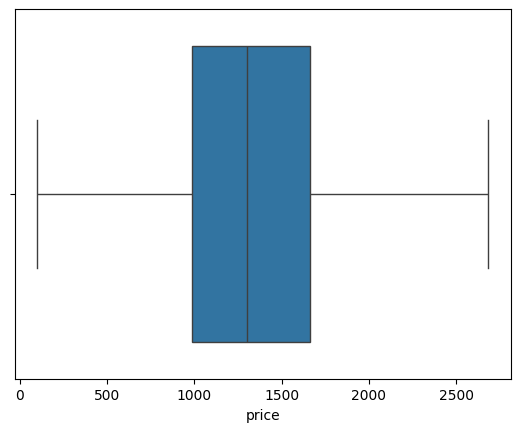

In [210]:
sns.boxplot(data=df, x="price")

In [211]:
df.head()


,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,log_price
0,Other,2,4,0,0,yes,1920.0,2,Other,GA,34.0648,-84.0849,7.560601
1,Other,1,3,0,0,yes,973.0,1,Other,LA,32.4544,-93.7135,6.881411
2,Other,1,3,0,0,yes,1585.0,1,Los Angeles,CA,34.0372,-118.2972,7.368970
3,Other,1,3,0,0,yes,950.0,1,Other,TX,27.8689,-97.2057,6.857514
4,Other,1,4,0,0,no,1275.0,1,Other,Other,41.7588,-72.6148,7.151485


In [212]:
df['bathrooms'].value_counts()

,count
bathrooms,
1,60717
2,38107
3,2606
4,249
5,149


<Axes: xlabel='bedrooms'>

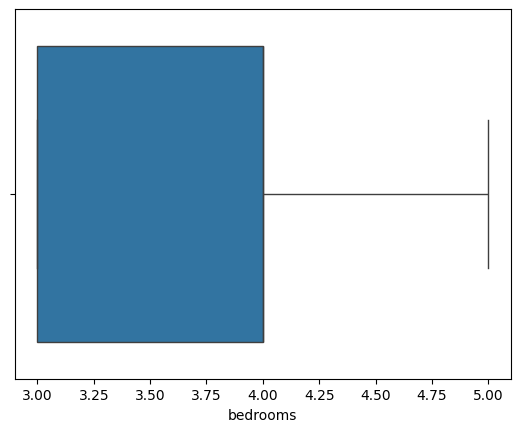

In [230]:
sns.boxplot(data=df, x="bedrooms")

In [229]:
df=remove_outliers_iqr(df,'bedrooms')

bedrooms IQR bounds:
Lower: 1.5, Upper: 5.5
Removed 192 outliers from bedrooms


In [ ]:
sns.boxplot(data=df, x="bedrooms")

<Axes: xlabel='pets_allowed'>

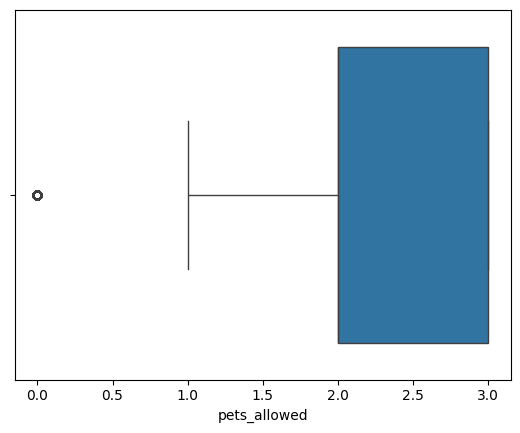

In [231]:
sns.boxplot(data=df, x="pets_allowed")

In [232]:
df=remove_outliers_iqr(df,'pets_allowed')

pets_allowed IQR bounds:
Lower: 0.5, Upper: 4.5
Removed 2169 outliers from pets_allowed


In [ ]:
sns.boxplot(data=df, x="pets_allowed")

after removing all outlier i cheack the graphics there most of the outlier is removed now the main step is label encoding


now encoding start **there**

In [218]:
from sklearn.preprocessing import LabelEncoder

le_model_for_pets_allowed_or_not = LabelEncoder()

df['pets_allowed'] = le_model_for_pets_allowed_or_not.fit_transform(df['pets_allowed'])

print("Classes learned:", le_model_for_pets_allowed_or_not.classes_)


Classes learned: ['Cats' 'Dogs' 'no' 'yes']


Classes learned: ['Cats' 'Dogs' 'no' 'yes']
[2 3 0 1 ] so no is 2 and yes is 1 also same with 2 with cats and 3 with dogs

In [226]:
df['pets_allowed'].value_counts()

,count
pets_allowed,
2,59560
3,39893
0,2174
1,201


In [236]:
df.head()
df=df.drop(columns=['pets_allowed_encoded','log_price'])

In [238]:
x=df.drop(columns=['price'])
y=df['price']

In [239]:
x

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,square_feet,cityname,state,latitude,longitude
0,Other,2,4,0,0,3,2,Other,GA,34.0648,-84.0849
1,Other,1,3,0,0,3,1,Other,LA,32.4544,-93.7135
2,Other,1,3,0,0,3,1,Los Angeles,CA,34.0372,-118.2972
3,Other,1,3,0,0,3,1,Other,TX,27.8689,-97.2057
4,Other,1,4,0,0,2,1,Other,Other,41.7588,-72.6148
...,...,...,...,...,...,...,...,...,...,...,...
109402,Other,2,4,0,0,3,3,Other,FL,30.0912,-81.6257
109403,Other,2,4,0,0,3,2,Other,TX,32.8471,-96.9648
109405,Other,1,4,0,0,3,1,Other,OH,39.1793,-84.2432
109406,Other,1,3,0,0,3,1,Other,AZ,35.1825,-111.6031


there we can apply model imbalnced techniques on features but there we dont need that because our model can easily learna as it is continous values so we dont need how to use that to predict the values

In [241]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(x, y)


ValueError: could not convert string to float: 'Other'